<a href="https://colab.research.google.com/github/edujongkook/colab_sbs_python_weekend/blob/main/python_%EA%B8%B0%EC%B4%88_7%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 7일차 강의 내용
- html 이해 (html - css - javascript)
- requests 모듈
- Beautifulsoup 모듈
- 웹 크롤링 프로그램 만들기



### HTML(HyperText Markup Language)의 이해 -p316

#### html 구조

In [ ]:
<html>
    <head>
        <meta charset="UTF-8">
        <title> 페이지 제목 </title>
    </head>
    <body>
        <h1> h1 사이즈 </h1>
        <div class="div"> div 영역 </div>
        <button id="button"> 버튼 </button>

    </body>
</html>

- HTML 의 계층구조

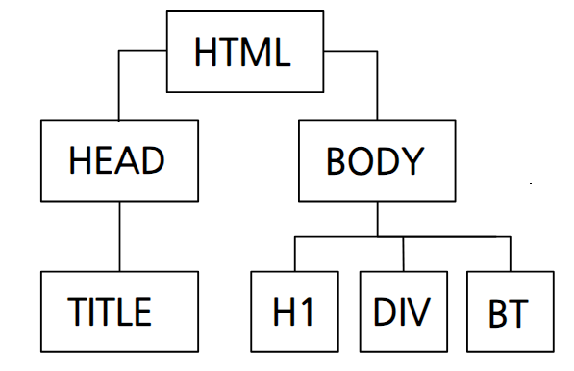

#### ⚡ html 요소들
https://developer.mozilla.org/ko/docs/Web/HTML/Element

- HTML 태그 요소

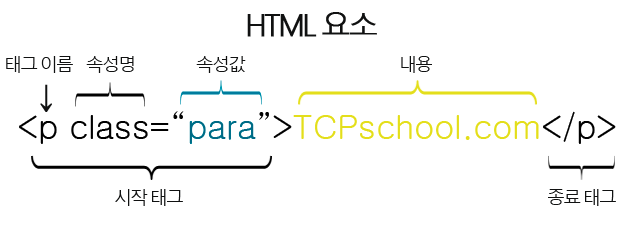

- HTML, CSS, JAVASCRIPT 의 관계  
https://codepen.io/pen/

html 예시

In [ ]:
<html>
    <head>
        <meta charset="utf-8">
    </head>
    <body>
        <h1> h1 사이즈 </h1>
        <div class="div"> div 영역 </div>
        <div class="div"> div 영역 </div>
        <div class="div"> div 영역 </div>
        <div class="div"> div 영역 </div>
        <button id="button"> 버튼 </button>
    </body>
</html>

css 예시

In [ ]:
*{
  outline : 1px solid red;
}

h1.test{
  color : blue;
}

.div{
  font-size : 100px;
  text-align : center;
}

JS 예시

In [ ]:
function clicked() {
  document.getElementsByClassName("test")[0].style.color = "red";
  alert("click!!");
}
document.getElementById("button").onclick = clicked

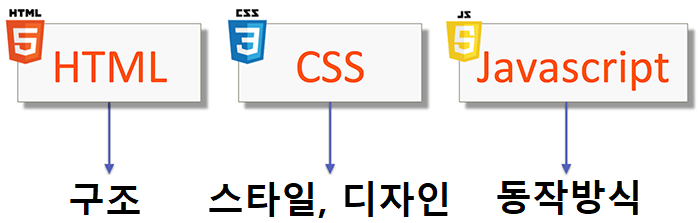

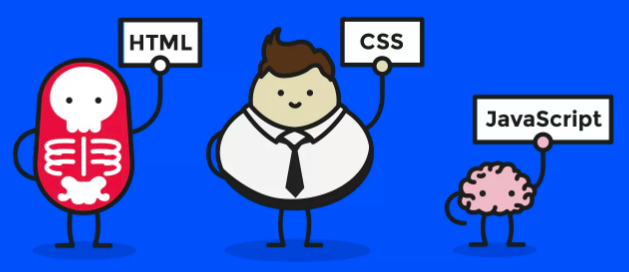

#### URL(Uniform Resource Locator) + 쿼리

- URL ) https://www.google.com/

- URL+쿼리 ) https://www.google.com/search?q=파이썬


? 이후에 q (파라미터) = 파이썬 (값)

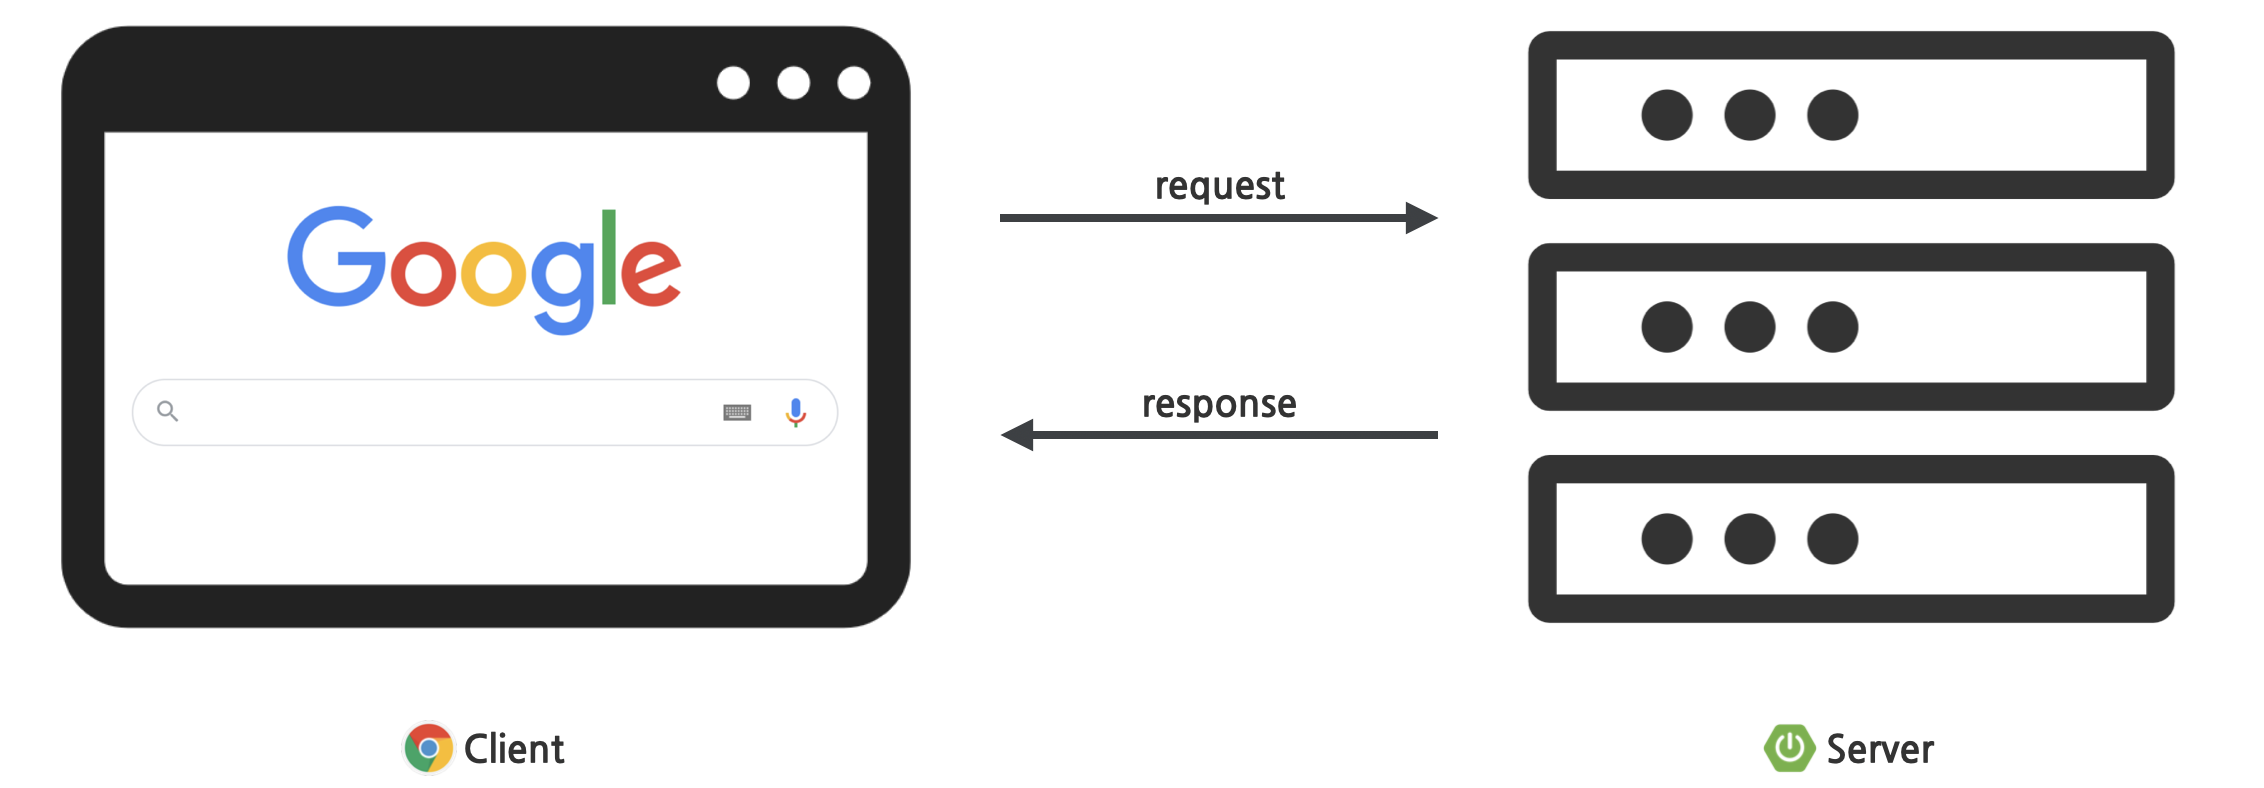

### requests 모듈 -p318

- requests.get

In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
url = 'https://www.naver.com'
response = requests.get(url)
print('응답코드: {}'.format(response.status_code))
print(response.text)

In [ ]:
url = 'https://search.naver.com/search.naver'
param = {'query': '파이썬'}
response = requests.get(url, params=param)
print(response.text)


- requests.post

- 온라인 html 뷰어
https://html.onlineviewer.net/

#### ✅ 기본예제 -p321  
네이버 영화에서 봉준호감독의 영화 '기생충'의 소개 페이지를 가져오는 프로그램 입니다.

In [ ]:
import requests

url = 'https://movie.naver.com/movie/bi/mi/basic.nhn'
param = {'code': 161967}
response = requests.get(url, params=param)
print(response.text)

### BeautifulSoup 모듈 -p322

In [ ]:
from bs4 import BeautifulSoup
import requests

url = '검색 대상 URL'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')



- 주요 메서드

#### 1. find()

In [ ]:
# html 소스
sample_html = '''
<div>
    <a href="https://www.naver.com">네이버</a>
    <a href="https://www.kakao.com">카카오</a>
</div>
'''

In [ ]:
from bs4 import BeautifulSoup


soup = BeautifulSoup(sample_html, 'html.parser')

In [ ]:
a = soup.find('a')

In [ ]:
soup.find('a').text

'네이버'

In [ ]:
a.get('href')  # 속성의 값

'https://www.naver.com'

In [ ]:
a['href']

'https://www.naver.com'

In [ ]:
soup.find('div').a # 태그요소인 경우

<a href="https://www.naver.com">네이버</a>

In [ ]:
soup.find('a')  # 부모태그

<a href="https://www.naver.com">네이버</a>

#### 2. find_all() 메서드

In [ ]:
# html 소스
sample_html = '''
<ul>
    <li id="movie">영화
        <li>여행</li>
        <li>독서</li>
    </li>

</ul>
'''

In [ ]:
soup = BeautifulSoup(sample_html, 'html.parser')

In [ ]:
list_hobby = soup.find_all('li')

In [ ]:
list_hobby

[<li id="movie">영화</li>, <li>여행</li>, <li>독서</li>]

In [ ]:
for li in list_hobby:
    print(li.text)

영화
여행
독서


In [ ]:
영화
여행
독서

In [ ]:
soup.find('ul').find('li').find_all('li')

In [ ]:
for li in soup.find_all('li'):
    print(li)

<li id="movie">영화</li>
<li>여행</li>
<li>독서</li>


#### 3. class 속성으로 찾기

In [ ]:
# html 소스
sample_html = '''
<div>
    <div class="gnb">뉴스</div>
    <div class="gnb">지도</div>
</div>
'''

In [ ]:
soup = BeautifulSoup(sample_html, 'html.parser')

In [ ]:
soup.find_all('div')

[<div>
 <div class="gnb">뉴스</div>
 <div class="gnb">지도</div>
 </div>,
 <div class="gnb">뉴스</div>,
 <div class="gnb">지도</div>]

In [ ]:
soup.find_all('div', class_='gnb')

[<div class="gnb">뉴스</div>, <div class="gnb">지도</div>]

#### 4. id 속성으로 찾기

In [ ]:
# html 소스
sample_html = '''
<div id="container">
    <div id="left">왼쪽 영역
        <div class="list">왼쪽 리스트</div>
        <div class="view">왼쪽 뷰</div>
    </div>
    <div id="right">오른쪽 영역
        <div class="list">오른쪽 리스트</div>
        <div class="view">오른쪽 뷰</div>
    </div>
</div>
'''

In [ ]:
soup = BeautifulSoup(sample_html, 'html.parser')

In [ ]:
soup.find('div', id='left')

<div id="left">왼쪽 영역
        <div class="list">왼쪽 리스트</div>
<div class="view">왼쪽 뷰</div>
</div>

#### 5. ⚡ CSS selector 로 찾기

In [ ]:
# html 소스
sample_html = '''
<div id="container">
    <div id="left">왼쪽 영역
        <div class="list">왼쪽 리스트</div>
        <div class="view">왼쪽 뷰</div>
    </div>
    <div id="right">오른쪽 영역
        <div class="list">오른쪽 리스트</div>
        <div class="view">오른쪽 뷰</div>
    </div>
</div>
'''

In [ ]:
soup = BeautifulSoup(sample_html, 'html.parser')

In [ ]:
soup.select_one('#container')  # id selector

In [ ]:
soup.select('div > #left > span > div')

In [ ]:
soup.select('.list') # class selector

[<div class="list">왼쪽 리스트</div>, <div class="list">오른쪽 리스트</div>]

In [ ]:
soup.select('div.view')

In [ ]:
soup.select('#right > .list') # 계층 관계 selector

[<div class="list">오른쪽 리스트</div>]

In [ ]:
soup.select('#container > div')

- 개발자 도구에서 selector 카피 가능

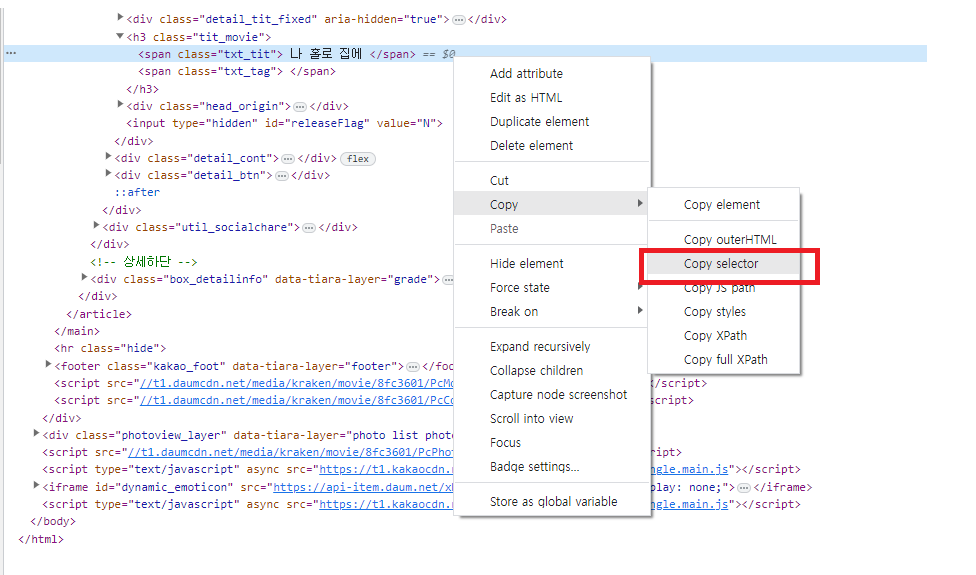

#### ✅기본예제변형 -p325

다음은 영화 나홀로집에를 다음 영화 사이트에서 검색 후 영화의 정보들을 출력하는 프로그램 입니다.

In [ ]:
import requests
from bs4 import BeautifulStoneSoup

url = 'https://movie.daum.net/moviedb/main?movieId=10016'

url = 'https://movie.daum.net/moviedb/main'
a = {'movieId': 10016}
response = requests.get(url, params=a)
html = response.text
soup = BeautifulSoup(html, 'html.parser')


In [ ]:
infos = soup.find_all('dl', class_='list_cont')

In [ ]:
infos

In [ ]:
infos[0].dd.text

'1991.07.06'

In [ ]:
print(f'{infos[0].dt.text} : {infos[0].dd.text}')

개봉 : 1991.07.06


In [ ]:
for info in infos:
    print(f'{info.dt.text} : {info.dd.text.strip()}')

개봉 : 1991.07.06
장르 : 코미디/가족
국가 : 미국
등급 : 전체관람가
러닝타임 : 105분
평점 : 9.0
누적관객 : 90명


### 동적페이지

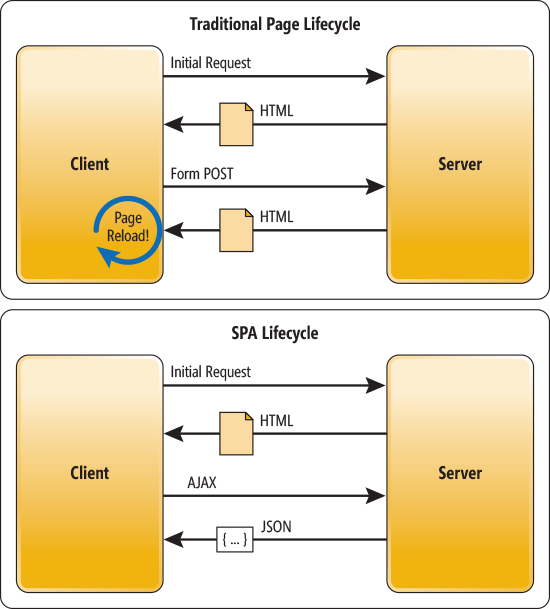

[링크 텍스트](https://)XHR(XMLHttpRequest) - AJAX (Asynchronous Javascript and Xml)

#### 동적페이지 크롤링 방식

1. Headless Browser (ex: Selenium 모듈) 사용
2. XHR response 를 받아 html 또는 json 등의 파일을 파싱

#### ⚡ Selenium 예제 블로그

ver 3.x
https://charimlab.tistory.com/entry/ep01%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81-11-%EB%8F%99%EC%A0%81-%ED%8E%98%EC%9D%B4%EC%A7%80%EC%9B%B9-%EB%8F%99%EC%9E%91-%EC%9E%90%EB%8F%99%ED%99%94Selenium-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC

ver 4.x
https://wikidocs.net/177133

#### XHR 이용하여 크롤링하기 (기상청 특보)  
https://www.weather.go.kr/w/weather/warning/status.do

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.weather.go.kr/w/wnuri-fct2021/weather/warning.do'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup

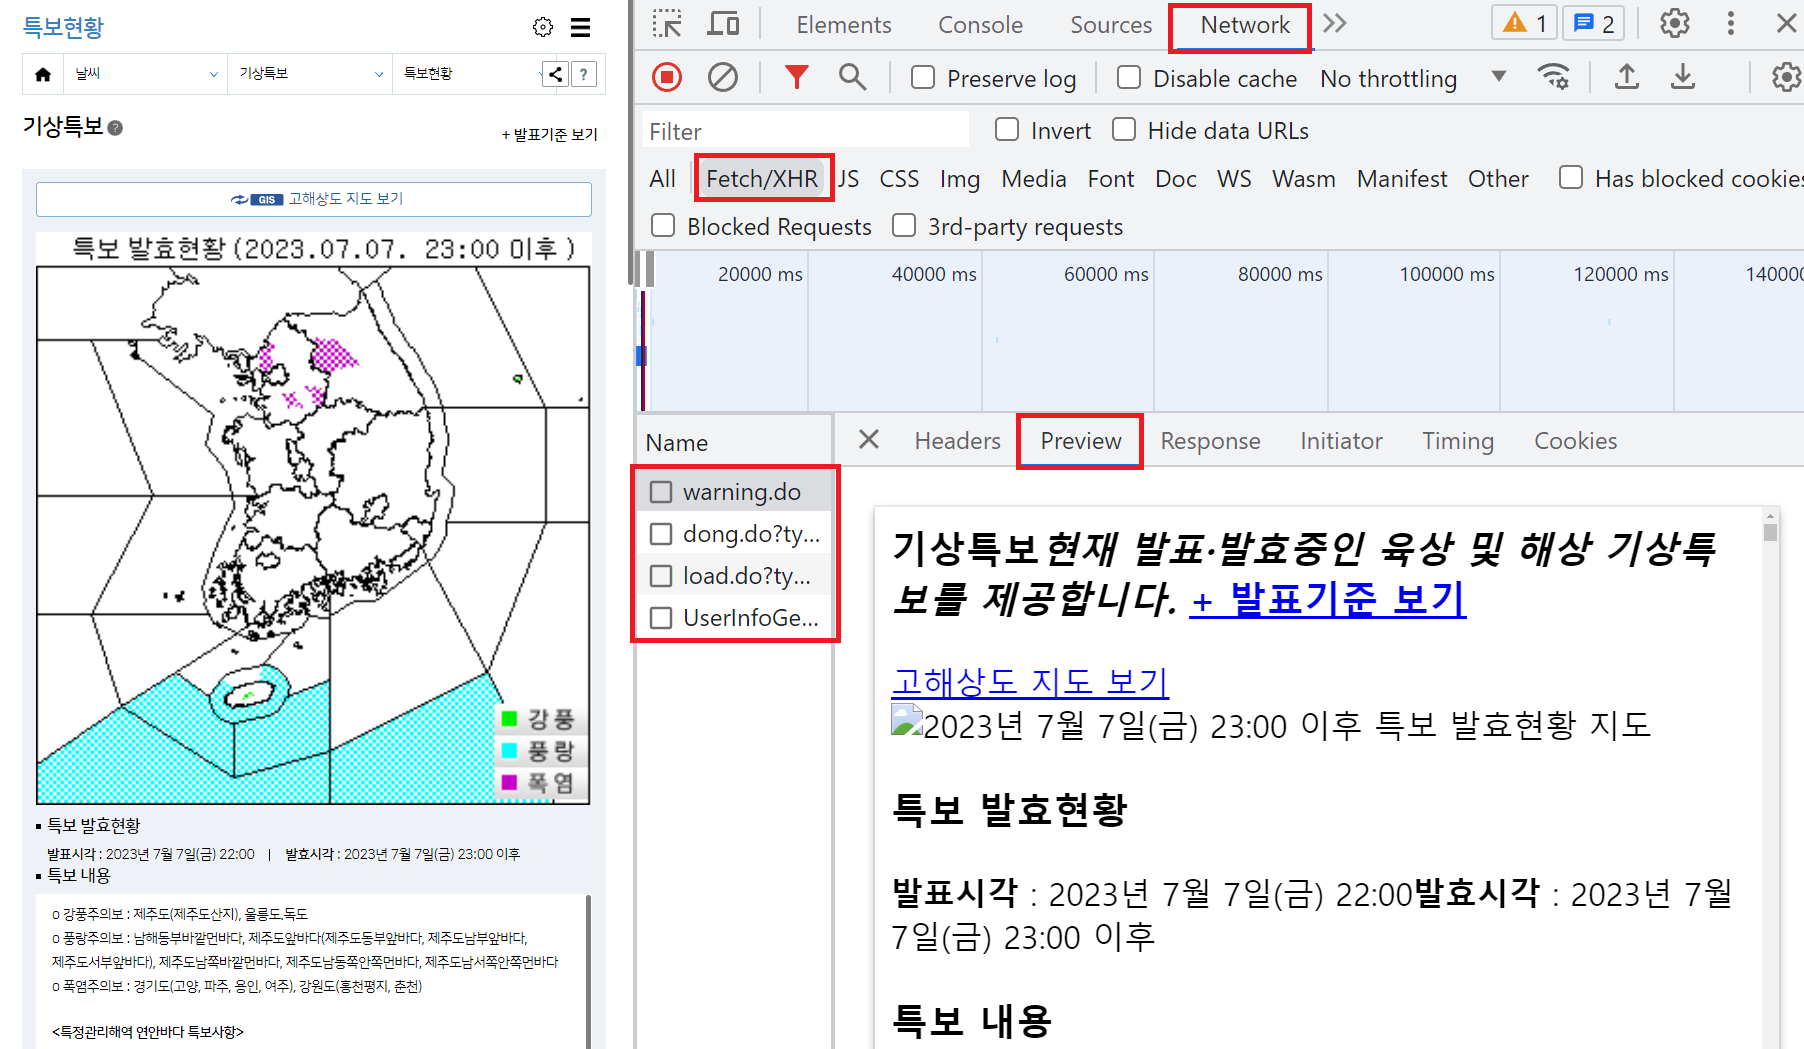

In [ ]:
url = 'https://www.weather.go.kr/w/wnuri-fct2021/weather/warning.do'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
tbody = soup.find("tbody")
list_tr = tbody.find_all('tr')
for tr in list_tr:
    print(tr.find_all('td'))


In [ ]:
tbody

In [ ]:
for tr in soup.select("tbody > tr"):
    infos = tr.find_all('td')
    print(f'특보: {infos[0].text}, 수준:{infos[1].text} \n해당지역:{infos[2].text}\
          \n발표시각:{infos[3].text}, 발효시각:{infos[4].text},\n해제예고:{infos[5].text}')
    print()

## 크롤링 프로그램 만들기

- 정적 페이지 크롤링(https://championmastery.gg/) - 게임 롤 랭커순위 사이트

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://championmastery.gg/champion?champion=-1'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')


In [ ]:
table = soup.find('table', class_='well')
tbody = table.find('tbody')
list_tr = tbody.find_all('tr')

In [ ]:
list_td = list_tr[0].find_all('td')

In [ ]:
print(type(tbody))

<class 'bs4.element.Tag'>


In [ ]:
for tr in list_tr:
    list_td = tr.find_all('td')
    for td in list_td:
        print(td.text)

In [ ]:
def get_champ(soup):
    list_champ = []
    well_tbody = soup.find("table", class_="well").find("tbody")
    rows = well_tbody.find_all("tr")
    title = soup.select_one("#content > h1 > span").text
    for row in rows:
        list_champ.append([row.find("td").text, row.find("a").text,
                            row.find_all("td")[2].text, title])
    return list_champ

- 각 챔프별 모든  url로 들어가 랭커들의 정보를 get_champ 함수로 읽어 하나의 파일 ranker.csv 로 저장

In [ ]:
import requests
import csv
from bs4 import BeautifulSoup


url = 'https://championmastery.gg/'
request_header = {
            "Accept-Language": "ko-KR"
        }
response = requests.get(url, headers=request_header)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
champs = soup.find_all("strong", class_="champion-name")
list_ranker = [["랭크", "플레이어", "점수", "챔프"]]
for i, name in enumerate(champs[2:]):
    champ_url = name.parent['href']
    champ_name = name.text
    print(i, champ_url, champ_name)
    try:
        url = 'https://championmastery.gg{}'.format(champ_url)
        request_header = {
            "Accept-Language": "ko-KR"
        }
        response = requests.get(url, headers=request_header)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        list_ranker += get_champ(soup)

    except Exception as e:
        print(e)
        continue
with open('ranker.csv', "w") as f:
    writer = csv.writer(f)
    writer.writerows(list_ranker)

0 /champion?champion=86 가렌
1 /champion?champion=3 갈리오
2 /champion?champion=41 갱플랭크
3 /champion?champion=79 그라가스
4 /champion?champion=104 그레이브즈
5 /champion?champion=887 그웬
6 /champion?champion=150 나르
7 /champion?champion=267 나미
8 /champion?champion=75 나서스
9 /champion?champion=111 노틸러스
10 /champion?champion=56 녹턴
11 /champion?champion=20 누누와 윌럼프
12 /champion?champion=76 니달리
13 /champion?champion=518 니코
14 /champion?champion=895 닐라
15 /champion?champion=122 다리우스
16 /champion?champion=131 다이애나
17 /champion?champion=119 드레이븐
18 /champion?champion=13 라이즈
19 /champion?champion=497 라칸
20 /champion?champion=33 람머스
21 /champion?champion=99 럭스
22 /champion?champion=68 럼블
23 /champion?champion=888 레나타 글라스크
24 /champion?champion=58 레넥톤
25 /champion?champion=89 레오나
26 /champion?champion=421 렉사이
27 /champion?champion=526 렐
28 /champion?champion=107 렝가
29 /champion?champion=236 루시안
30 /champion?champion=117 룰루
31 /champion?champion=7 르블랑
32 /champion?champion=64 리 신
33 /champion?champion=92 리븐
34 /cha